In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
df = pd.read_csv('steam_games.csv')
df = df.dropna()
df = df.drop_duplicates()


In [24]:
df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...",$59.99,$70.42
37,https://store.steampowered.com/app/532210/Life...,app,Life is Strange 2,"After a tragic incident, brothers Sean and Dan...","Mostly Positive,(155),- 72% of the 155 user re...","Very Positive,(4,437),*,- 86% of the 4,437 use...","Sep 26, 2018",DONTNOD Entertainment,"Square Enix,Square Enix","Choices Matter,Story Rich,Adventure,Great Soun...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",46.0,Adventure,About This Game Purchase the Complete Season...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7 or above (64-bit Operat...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$7.99,$39.95
75,https://store.steampowered.com/app/476600/Call...,app,Call of Duty®: WWII,Call of Duty® returns to its roots with Call o...,"Mixed,(66),- 53% of the 66 user reviews in the...","Mixed,(12,703),- 54% of the 12,703 user review...","Nov 2, 2017","Sledgehammer Games,Raven Software","Activision,Activision","World War II,FPS,Multiplayer,War,Action,Zombie...","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...",35.0,Action,About This Game Includes Digital Edition Bon...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1.020,$906.48
94,https://store.steampowered.com/app/418240/Shad...,app,Shadow Tactics: Blades of the Shogun,Shadow Tactics is a hardcore tactical stealth ...,"Very Positive,(124),- 94% of the 124 user revi...","Overwhelmingly Positive,(7,238),- 95% of the 7...","Dec 6, 2016",Mimimi Productions,"Daedalic Entertainment,Daedalic Entertainment","Stealth,Tactical,Ninja,Strategy,Real Time Tact...","Single-player,Steam Achievements,Full controll...","English,French,German,Spanish - Spain,Japanese...",44.0,"Indie,Strategy",About This Game Shadow Tactics is a hardcore...,Mature Content Description The developers de...,"Minimum:,OS:,Windows Vista 64-bit,Processor:,I...","Recommended:,OS:,Windows 7 64-bit or higher, W...",$39.99,$13.59
153,https://store.steampowered.com/app/513710/SCUM/,app,SCUM,SCUM aims to evolve the multiplayer open world...,"Mixed,(346),- 58% of the 346 user reviews in t...","Mixed,(22,177),- 64% of the 22,177 user review...","Aug 29, 2018","Gamepires,Croteam","Devolver Digital,Devolver Digital","Early Access,Survival,Open World,Multiplayer,Z...","Single-player,Multi-player,Online Multi-Player...","English,German,Russian,Simplified Chinese,Fren...",56.0,"Action,Adventure,Indie,Massively Multiplayer,E...",About This Game The world’s unquenchable need...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$19.99,$28.48


In [25]:
df['recent_reviews'].fillna('No Reviews', inplace=True)
df['all_reviews'].fillna('No Reviews', inplace=True)
df['original_price'].fillna(0, inplace=True)
df['discount_price'].fillna(0, inplace=True)

In [26]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

In [27]:
df['recent_sentiment'] = df['recent_reviews'].str.extract(r'(\w+)')
df['all_sentiment'] = df['all_reviews'].str.extract(r'(\w+)')

In [28]:
top_rated = df[df['all_sentiment'].str.contains('Positive|Overwhelmingly Positive', case=False, na=False)]
top_rated = top_rated.sort_values(by='all_sentiment', ascending=False).head(10)
print(top_rated[['name', 'all_sentiment']])

Empty DataFrame
Columns: [name, all_sentiment]
Index: []


In [29]:
from collections import Counter

# Split and count popular tags
tags = df['popular_tags'].str.split(',').explode()
tag_counts = Counter(tags)
print("Most Popular Tags:", tag_counts.most_common(10))

Most Popular Tags: [('Singleplayer', 65), ('Action', 63), ('Adventure', 58), ('Atmospheric', 49), ('Indie', 46), ('Violent', 43), ('Gore', 39), ('Story Rich', 39), ('Multiplayer', 36), ('Great Soundtrack', 34)]


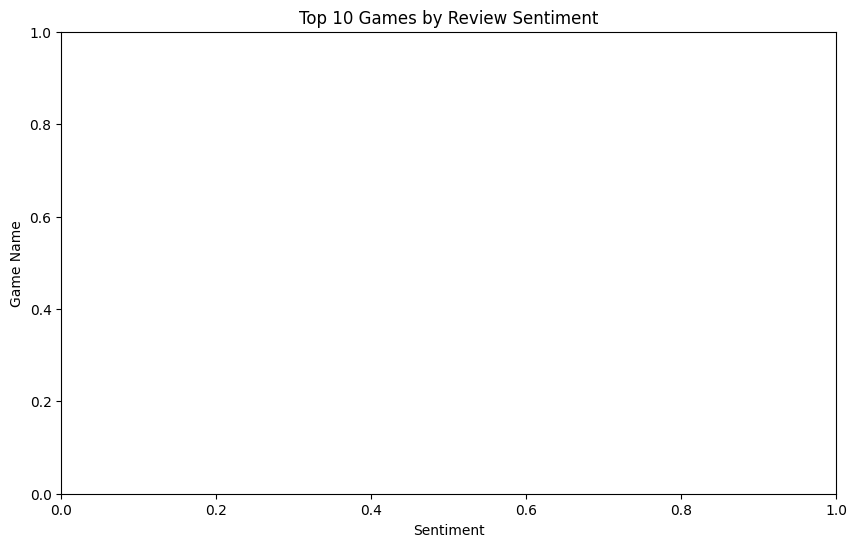

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='all_sentiment', y='name', data=top_rated, palette='viridis')
plt.title('Top 10 Games by Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Game Name')
plt.show()

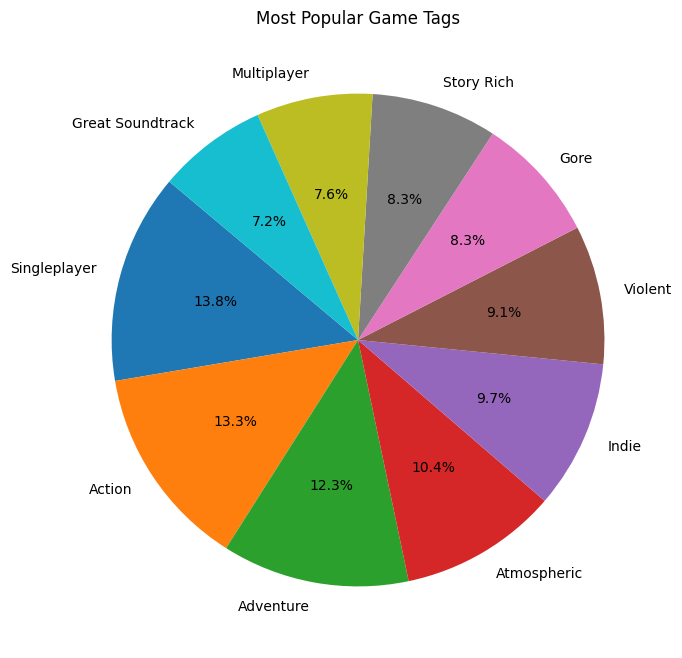

In [31]:
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])
plt.figure(figsize=(8, 8))
plt.pie(top_tags['Count'], labels=top_tags['Tag'], autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Game Tags')
plt.show()

In [32]:
top_rated.to_csv('top_rated_games.csv', index=False)
top_tags.to_csv('top_tags.csv', index=False)

In [35]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year

In [36]:
# Function to extract review counts
def extract_reviews(text):
    try:
        return int(''.join(filter(str.isdigit, str(text))))
    except:
        return 0

# Apply the function to the all_reviews column
df['review_count'] = df['all_reviews'].apply(extract_reviews)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19544\1842113922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='name', data=top_games, palette='viridis')


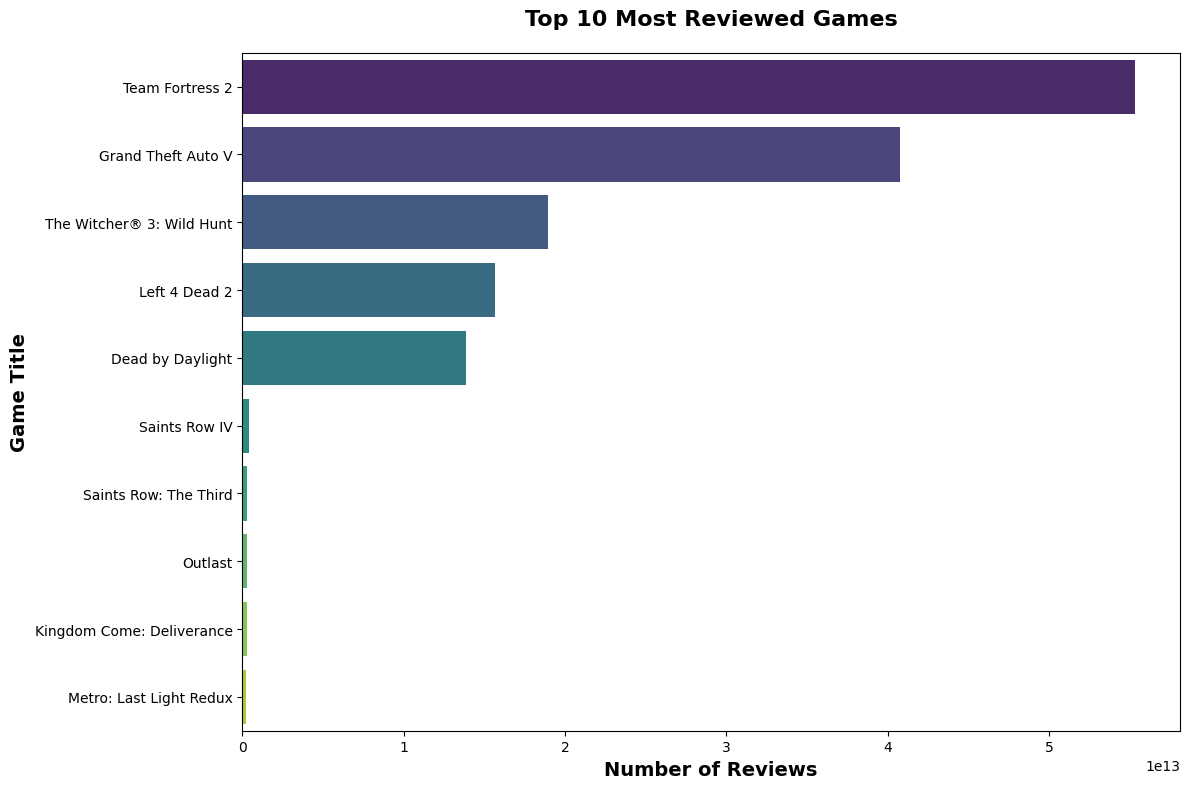

In [37]:
# Group by game name and sum review counts
top_games = df.groupby('name')['review_count'].sum().reset_index()

# Sort by review count and get the top 10
top_games = top_games.sort_values('review_count', ascending=False).head(10)

# Plot the top games
plt.figure(figsize=(12, 8))
sns.barplot(x='review_count', y='name', data=top_games, palette='viridis')
plt.title('Top 10 Most Reviewed Games', fontsize=16, pad=20, weight='bold')
plt.xlabel('Number of Reviews', fontsize=14, weight='bold')
plt.ylabel('Game Title', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

top_games.to_csv('top_games.csv', index=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_19544\740499157.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', y='genre', data=genre_reviews, palette='magma')


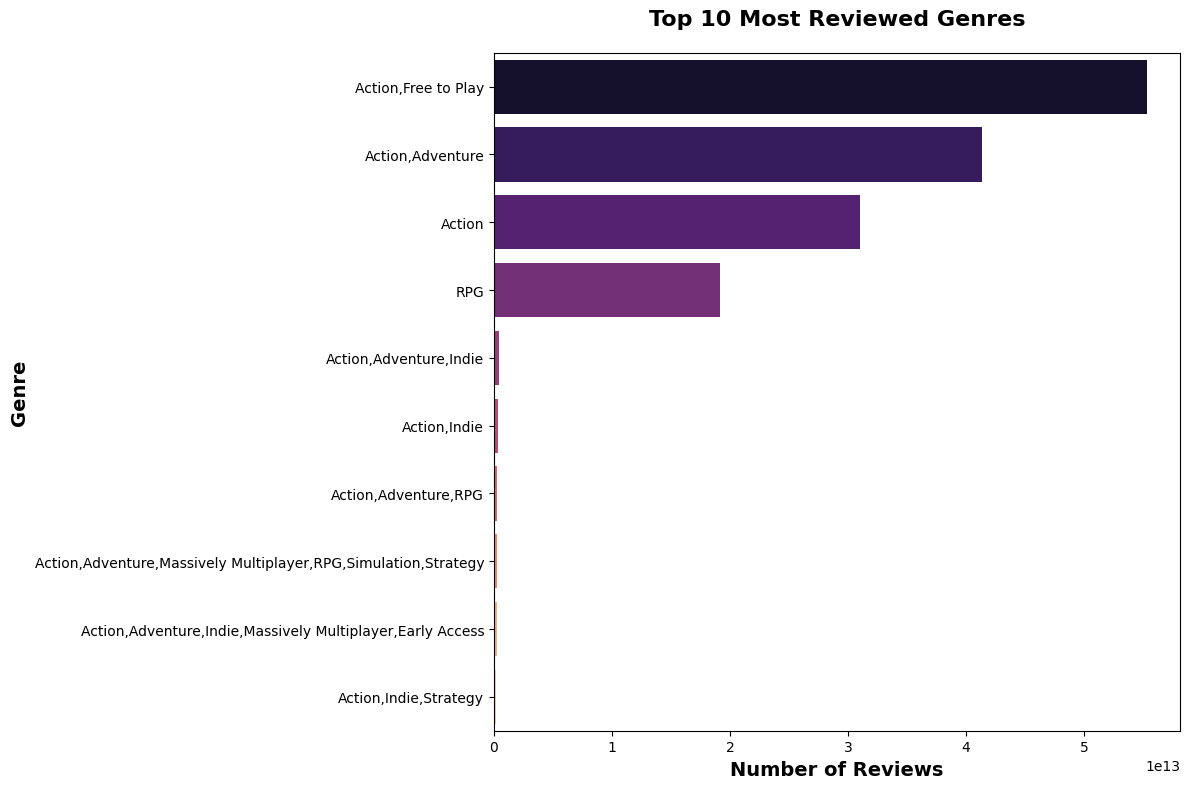

In [38]:
# Group by genre and sum review counts
genre_reviews = df.groupby('genre')['review_count'].sum().reset_index()

# Sort by review count and get the top 10
genre_reviews = genre_reviews.sort_values('review_count', ascending=False).head(10)

# Plot the top genres
plt.figure(figsize=(12, 8))
sns.barplot(x='review_count', y='genre', data=genre_reviews, palette='magma')
plt.title('Top 10 Most Reviewed Genres', fontsize=16, pad=20, weight='bold')
plt.xlabel('Number of Reviews', fontsize=14, weight='bold')
plt.ylabel('Genre', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
genre_reviews.to_csv('genre_reviews.csv', index=False)

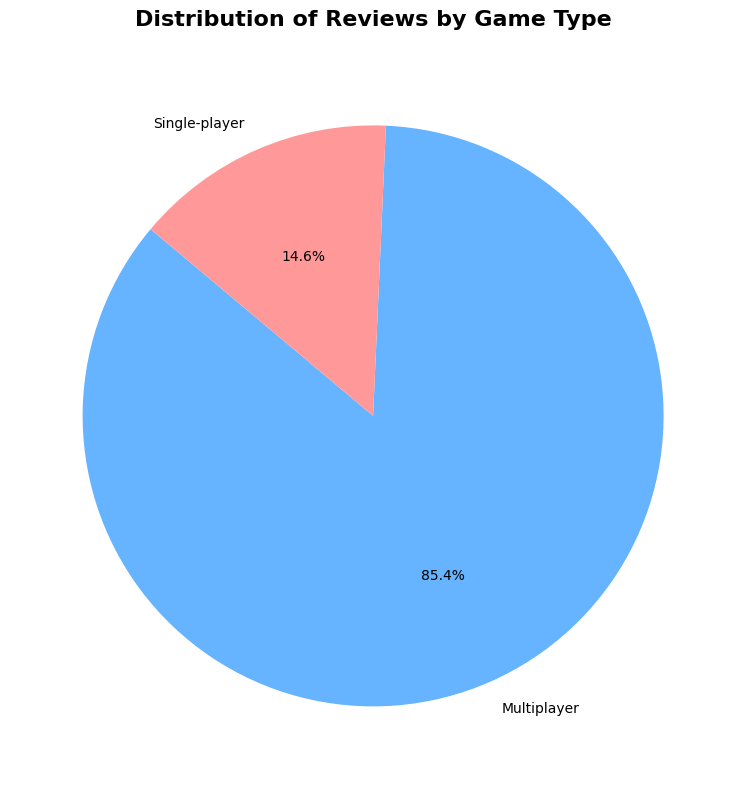

In [39]:
# Extract game type (single-player/multiplayer) from game_details
df['game_type'] = df['game_details'].apply(lambda x: 'Multiplayer' if 'Multi-player' in x else 'Single-player')

# Group by game type and sum review counts
game_type_reviews = df.groupby('game_type')['review_count'].sum().reset_index()

# Plot the distribution
plt.figure(figsize=(8, 8))
plt.pie(game_type_reviews['review_count'], labels=game_type_reviews['game_type'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Reviews by Game Type', fontsize=16, pad=20, weight='bold')
plt.tight_layout()
plt.show()

game_type_reviews.to_csv('game_type_reviews.csv', index=False)

In [40]:
import re
import pandas as pd

# Sample regex-based parsing (adjust based on actual text structure)
def parse_specs(text):
    if pd.isna(text):
        return None
    
    specs = {
        "cpu": None,
        "gpu": None,
        "ram": None,
        "storage": None,
        "os": None
    }
    
    # Extract CPU (e.g., "Intel Core i5-2500K" or "AMD FX-6300")
    cpu_match = re.search(r'(Intel|AMD)[\w\s-]+(i\d|Ryzen|FX|Athlon|Celeron|Pentium|Phenom)[\w\s-]*', text, re.IGNORECASE)
    if cpu_match:
        specs["cpu"] = cpu_match.group(0).strip()
    
    # Extract GPU (e.g., "NVIDIA GTX 970" or "AMD RX 580")
    gpu_match = re.search(r'(NVIDIA|AMD|Intel)[\w\s-]*(GTX|RTX|Radeon|RX|HD|UHD|Iris|Arc)[\s\d]+[\w]*', text, re.IGNORECASE)
    if gpu_match:
        specs["gpu"] = gpu_match.group(0).strip()
    
    # Extract RAM (e.g., "8 GB RAM")
    ram_match = re.search(r'(\d+)\s*(GB|MB)\s*(RAM|Memory)', text, re.IGNORECASE)
    if ram_match:
        specs["ram"] = int(ram_match.group(1)) * (1 if ram_match.group(2) == "GB" else 0.001)
    
    # Extract Storage (e.g., "20 GB available space")
    storage_match = re.search(r'(\d+)\s*(GB|MB)\s*(available|storage|space)', text, re.IGNORECASE)
    if storage_match:
        specs["storage"] = int(storage_match.group(1)) * (1 if storage_match.group(2) == "GB" else 0.001)
    
    return specs

# Apply parsing to the dataset
df['min_specs'] = df['minimum_requirements'].apply(parse_specs)
df['rec_specs'] = df['recommended_requirements'].apply(parse_specs)

In [41]:
# Example: Assigning CPU/GPU tiers (simplified)
def classify_cpu(cpu_name):
    if not cpu_name:
        return None
    cpu_name = cpu_name.lower()
    
    # Low-end (e.g., Intel i3, AMD FX, old dual-cores)
    if "i3" in cpu_name or "fx" in cpu_name or "pentium" in cpu_name or "athlon" in cpu_name:
        return "Low"
    # Mid-range (e.g., Intel i5, AMD Ryzen 5)
    elif "i5" in cpu_name or "ryzen 5" in cpu_name:
        return "Mid"
    # High-end (i7, i9, Ryzen 7/9)
    elif "i7" in cpu_name or "i9" in cpu_name or "ryzen 7" in cpu_name or "ryzen 9" in cpu_name:
        return "High"
    else:
        return "Unknown"

def classify_gpu(gpu_name):
    if not gpu_name:
        return None
    gpu_name = gpu_name.lower()
    
    # Low-end (e.g., Intel HD, GT 1030, RX 550)
    if "hd" in gpu_name or "gt 10" in gpu_name or "rx 550" in gpu_name:
        return "Low"
    # Mid-range (GTX 1060, RTX 2060, RX 580)
    elif "gtx 16" in gpu_name or "rtx 2060" in gpu_name or "rx 580" in gpu_name:
        return "Mid"
    # High-end (RTX 3080, RX 6800 XT)
    elif "rtx 30" in gpu_name or "rx 6800" in gpu_name:
        return "High"
    else:
        return "Unknown"

# Apply classification
df['cpu_tier'] = df['min_specs'].apply(lambda x: classify_cpu(x['cpu']) if x else None)
df['gpu_tier'] = df['min_specs'].apply(lambda x: classify_gpu(x['gpu']) if x else None)
df['ram_gb'] = df['min_specs'].apply(lambda x: x['ram'] if x else None)

In [42]:
# Count games by hardware tier
low_end_pc_games = df[df['cpu_tier'].isin(['Low', 'Mid']) & df['gpu_tier'].isin(['Low', 'Mid'])]
print(f"Games playable on low/mid PCs: {len(low_end_pc_games) / len(df) * 100:.1f}%")

Games playable on low/mid PCs: 13.4%


<Axes: xlabel='cpu_tier', ylabel='review_score'>

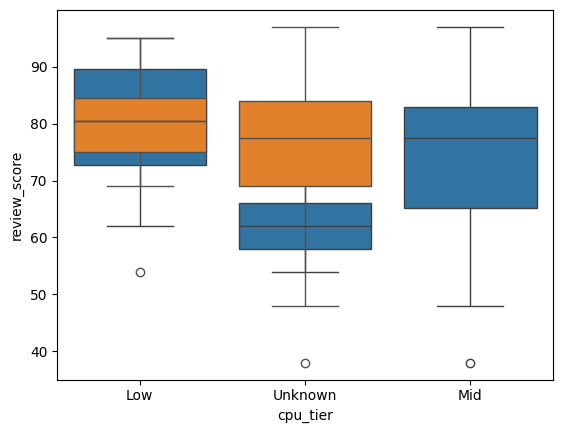

In [43]:
# Using 'all_reviews' as a success proxy (e.g., "% Positive")
df['review_score'] = df['all_reviews'].str.extract(r'(\d+)%').astype(float)

# Compare review scores by hardware tier
import seaborn as sns
sns.boxplot(x='cpu_tier', y='review_score', data=df)
sns.boxplot(x='gpu_tier', y='review_score', data=df)

In [44]:
# Group by genre and check avg. hardware requirements
genre_hw = df.groupby('genre').agg({
    'cpu_tier': lambda x: (x == 'Low').mean(),
    'gpu_tier': lambda x: (x == 'Low').mean(),
    'review_score': 'mean'
}).sort_values('cpu_tier', ascending=False)

print(genre_hw.head(10))  # Top genres with low requirements

                                                    cpu_tier  gpu_tier  \
genre                                                                    
RPG,Strategy                                             1.0       1.0   
Action,Indie,Massively Multiplayer,RPG,Early Ac...       1.0       0.0   
Indie,Strategy                                           1.0       1.0   
Casual,Indie                                             1.0       1.0   
Adventure,Indie,Simulation,Strategy                      1.0       1.0   
Action,Adventure,Indie,RPG,Early Access                  1.0       0.0   
Action,RPG,Strategy                                      1.0       1.0   
Action,Adventure,Indie,Simulation,Strategy               1.0       0.0   
Action,Adventure,Massively Multiplayer,Early Ac...       1.0       0.0   
Action,Adventure,Massively Multiplayer,RPG,Simu...       1.0       0.0   

                                                    review_score  
genre                                       

In [45]:
# Define sweet spot
sweet_spot = df[
    (df['cpu_tier'].isin(['Low', 'Mid'])) &
    (df['gpu_tier'].isin(['Low', 'Mid'])) &
    (df['ram_gb'] <= 8)
]

# Compare performance
print(f"Avg. review score for Sweet Spot games: {sweet_spot['review_score'].mean():.1f}%")
print(f"Avg. review score for High-End games: {df[df['gpu_tier'] == 'High']['review_score'].mean():.1f}%")

Avg. review score for Sweet Spot games: 83.5%
Avg. review score for High-End games: nan%


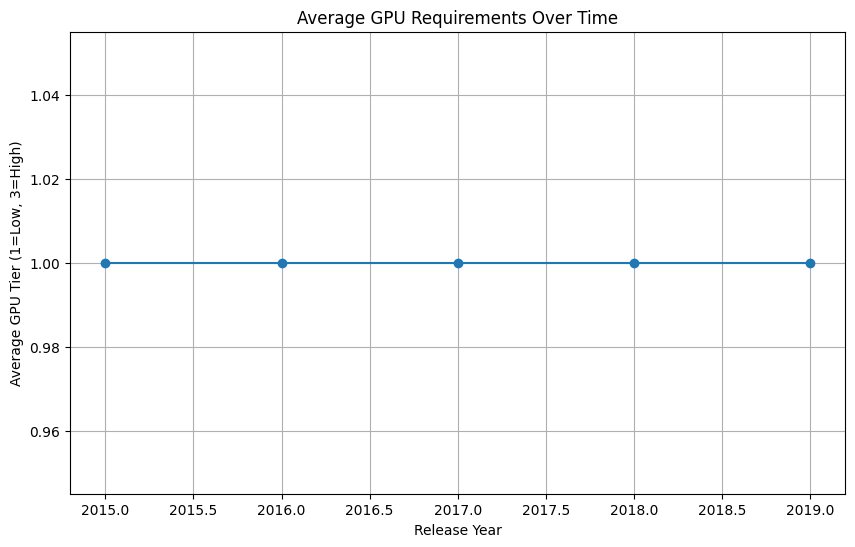

In [50]:
# Extract year from release date
df['year'] = pd.to_datetime(df['release_date']).dt.year

# Group by year and calculate average tier (converted to numbers)
yearly_trend = df.groupby('year')['gpu_num'].mean()

plt.figure(figsize=(10, 6))
yearly_trend.plot(marker='o')
plt.title('Average GPU Requirements Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average GPU Tier (1=Low, 3=High)')
plt.grid()
plt.show()